In [ ]:
!pip install sastrawi
!pip install nltk
!pip install numpy
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 209 kB 7.6 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import re
import joblib
import string
import nltk #library untuk mengolah kata
nltk.download('punkt') #untuk mengunduh tokenize
nltk.download('stopwords')
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df = pd.read_excel('/content/dataset.xlsx')
df.head()

,kategori,Label,sms
0,Normal,0,sebelumnya saya minta maaf sudah menggangu wak...
1,Normal,0,apakah bapak dosen ada diruangan?
2,Normal,0,"selamat pagi bu, saya ingin mengumpulkan tugas"
3,Normal,0,"perkenalkan nama saya anam, saya dari kelas 6b"
4,Normal,0,prodi mewajibkan untuk membuat kontrak kuliah ...


In [ ]:
#IMPORT STOPWORD
from nltk.tokenize import sent_tokenize, word_tokenize
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

In [ ]:
strip = " aku kamu ".strip()
strip

'aku kamu'

In [ ]:
def pre_process(text):
    #mengubah teks menjadi format kecil semua
    text = text.lower()
#menghapus angka
    text = re.sub(r"\d+", " ", text)
#menghapus danta baca
    text = text.translate(str.maketrans(" ", " ", string.punctuation))
#menghapus karakter kosong
    text = text.strip()
#memisah kata perkata menggunakan spasi
    pisah = text.split()
#memisah mnjadi kata katta
    tokens = nltk.tokenize.word_tokenize(text)
#filtering
    factory = StopWordRemoverFactory()
    stopword = factory.create_stop_word_remover()
    text = stopword.remove(text)

    return text
#preprocessing pada kolom komentar
df['sms'] = df['sms'].apply(lambda x:pre_process(x))
df.head()


,kategori,Label,sms
0,Normal,0,sebelumnya minta maaf menggangu waktu bapak ib...
1,Normal,0,bapak dosen diruangan
2,Normal,0,selamat pagi bu ingin mengumpulkan tugas
3,Normal,0,perkenalkan nama anam dari kelas b
4,Normal,0,prodi mewajibkan membuat kontrak kuliah peratu...


In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, GRU, Flatten
from keras.layers import Bidirectional, GlobalMaxPool1D
from keras.models import Model, Sequential
from keras.layers import Convolution1D
from keras import initializers, regularizers, constraints, optimizers, layers

from keras.callbacks import ModelCheckpoint
from keras.utils import np_utils

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
#membagi  data menjadi train dan test
train_df, test_df = train_test_split(df, test_size = 0.2, random_state = 42)
print ("Training data size : ", train_df.shape)
print ("Test data size : ", test_df.shape)

Training data size :  (722, 3)
Test data size :  (181, 3)


In [ ]:
train_df

,kategori,Label,sms
10,Normal,0,alhmdulilah semoga cepat wisuda yah
841,Penipuan,1,smlt m ndpt hadiah toyota all new avanza dr te...
363,Normal,0,nama table table pasien irj gnti data pasien lupa
821,Penipuan,1,selamat m dptkan hadiah unit mobil honda jaz...
792,Penipuan,1,pt tri no v slamat no simcard mraih cek tun...
...,...,...,...
106,Normal,0,bu buka jam bu
270,Normal,0,kalau ayam kremes cabai ijo teh kalau baka...
860,Penipuan,1,sy dr hj fatima sdh cocok kena rumah tanah bpk...
435,Normal,0,rasa mau sidang bulan depaaan mel jahaaat pisaaan


In [ ]:
test_df

,kategori,Label,sms
70,Normal,0,assalamu alaikum nama mau minta bantu
457,Normal,0,sekali libur malaysia wk
218,Normal,0,hmm sebenernya cuman eksekusi jquery control s...
250,Normal,0,jadi cari sibuk jg biar ga mikirin cowo melulu
39,Normal,0,aku dy wk makanya kurang restu jg krna jauh
...,...,...,...
863,Penipuan,1,sy rudy dri malaysia brencana investasi uang s...
442,Normal,0,sama misal web pake dapet komisi tuh nah cipra...
858,Penipuan,1,surat putus tricare indonesia no xv pin menang...
25,Normal,0,perkenalkan nama anam dari kelas b


In [ ]:
top_words = 10000
tokenizer = Tokenizer(num_words=top_words)
tokenizer.fit_on_texts(train_df['sms'])
list_tokenized_train = tokenizer.texts_to_sequences(train_df['sms'])

max_review_length = 200
X_train = pad_sequences(list_tokenized_train, maxlen=max_review_length)
y_train = train_df['Label']

In [ ]:

from keras import optimizers
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
#membuat model
embedding_vecor_length = 32
def create_model():
  model = Sequential()
  model.add(Embedding(top_words+1, embedding_vecor_length, input_length=max_review_length))
  model.add(LSTM(100))
  model.add(Dense(1, activation='sigmoid'))
  opt = keras.optimizers.Adam(learning_rate=0.001)
  model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

  return model 
model =  create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 32)           320032    
                                                                 
 lstm (LSTM)                 (None, 100)               53200     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 373,333
Trainable params: 373,333
Non-trainable params: 0
_________________________________________________________________


In [ ]:
tokenizer.fit_on_texts(test_df['sms'])
list_tokenized_test = tokenizer.texts_to_sequences(test_df['sms'])

max_review_length = 200
X_test = pad_sequences(list_tokenized_test, maxlen=max_review_length)
y_test = test_df['Label']

In [ ]:
history2 = model.fit(X_test,y_test, epochs= 30, batch_size=32)

Epoch 1/30
6/6 [==============================] - 3s 149ms/step - loss: 0.6824 - accuracy: 0.6022
Epoch 2/30
6/6 [==============================] - 1s 147ms/step - loss: 0.6259 - accuracy: 0.6354
Epoch 3/30
6/6 [==============================] - 1s 148ms/step - loss: 0.5682 - accuracy: 0.6409
Epoch 4/30
6/6 [==============================] - 1s 146ms/step - loss: 0.4661 - accuracy: 0.7624
Epoch 5/30
6/6 [==============================] - 1s 145ms/step - loss: 0.3151 - accuracy: 0.9116
Epoch 6/30
6/6 [==============================] - 1s 147ms/step - loss: 0.3390 - accuracy: 0.8564
Epoch 7/30
6/6 [==============================] - 1s 147ms/step - loss: 0.2008 - accuracy: 0.9503
Epoch 8/30
6/6 [==============================] - 1s 145ms/step - loss: 0.1588 - accuracy: 0.9669
Epoch 9/30
6/6 [==============================] - 1s 144ms/step - loss: 0.1224 - accuracy: 0.9834
Epoch 10/30
6/6 [==============================] - 1s 144ms/step - loss: 0.0844 - accuracy: 1.0000
Epoch 11/30
6/6 [==

In [ ]:
checkpoint = keras.callbacks.ModelCheckpoint("hasil.h5", save_best_only=True)

In [ ]:
history = model.fit(X_train,y_train, epochs=30, batch_size=32, validation_split = 0.2, callbacks=[checkpoint])

Epoch 1/30
19/19 [==============================] - 3s 183ms/step - loss: 0.3534 - accuracy: 0.8718 - val_loss: 0.1995 - val_accuracy: 0.9379
Epoch 2/30
19/19 [==============================] - 3s 157ms/step - loss: 0.1264 - accuracy: 0.9601 - val_loss: 0.1373 - val_accuracy: 0.9586
Epoch 3/30
19/19 [==============================] - 3s 154ms/step - loss: 0.0508 - accuracy: 0.9844 - val_loss: 0.1118 - val_accuracy: 0.9655
Epoch 4/30
19/19 [==============================] - 3s 153ms/step - loss: 0.0286 - accuracy: 0.9931 - val_loss: 0.0978 - val_accuracy: 0.9655
Epoch 5/30
19/19 [==============================] - 3s 155ms/step - loss: 0.0187 - accuracy: 0.9965 - val_loss: 0.0957 - val_accuracy: 0.9655
Epoch 6/30
19/19 [==============================] - 3s 153ms/step - loss: 0.0137 - accuracy: 0.9965 - val_loss: 0.0902 - val_accuracy: 0.9655
Epoch 7/30
19/19 [==============================] - 3s 153ms/step - loss: 0.0070 - accuracy: 1.0000 - val_loss: 0.0891 - val_accuracy: 0.9586
Epoch 

In [ ]:
import pickle

In [ ]:
with open ('tokenizer.pickle', 'wb') as handle:
  pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
list_tokenized_test = tokenizer.texts_to_sequences(test_df['sms'])
X_test = pad_sequences(list_tokenized_test, maxlen=max_review_length)
y_test = test_df['Label']
prediction = model.predict(X_test)
y_pred =(prediction > 0.5)
print("Accuracy of the model : ", accuracy_score(y_pred, y_test))
print('F1 Score : ', f1_score(y_pred, y_test))
print('Confusion Matrix: ')
confusion_matrix(y_test, y_pred)

Accuracy of the model :  1.0
F1 Score :  1.0
Confusion Matrix: 


array([[115,   0],
       [  0,  66]])

In [ ]:
print("Accuracy of the model on Training Data is - " , model.evaluate(X_train,y_train)[1]*100 , "%")
print("Accuracy of the model on Testing Data is - " ,model.evaluate(X_test,y_test)[1]*100 , "%")

23/23 [==============================] - 1s 39ms/step - loss: 0.0270 - accuracy: 0.9945
Accuracy of the model on Training Data is -  99.44598078727722 %
6/6 [==============================] - 0s 40ms/step - loss: 3.8688e-04 - accuracy: 1.0000
Accuracy of the model on Testing Data is -  100.0 %


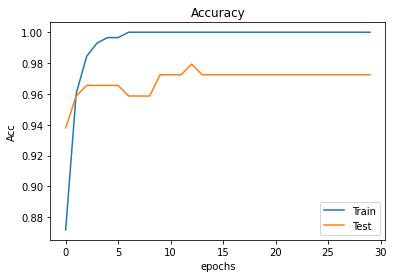

In [ ]:
plt.figure()
plt.plot(history.history["accuracy"], label = "Train")

plt.plot(history.history["val_accuracy"], label = "Test")

plt.title("Accuracy")
plt.ylabel("Acc")
plt.xlabel("epochs")
plt.legend()
plt.show()

In [ ]:
max_length = 40

In [ ]:
sentence = ["besok kuliah atau libur?"]
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length)
print(np.rint(model.predict(padded)))

[[0.]]


In [ ]:
sentence = ["casino online besar www jayabet4 com daftar diri raih bonus referral bonus cashback sportsbook 0 25 tiap minggu main smartphone pc "]
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length)
print(np.rint(model.predict(padded)))

[[1.]]


In [ ]:
sentence = ["e ticket promo terbang domestik internasional lalu via online mudah aman hub 08528548550 9 klick www mhegatravel com"]
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length)
print(np.rint(model.predict(padded)))

[[1.]]


In [ ]:
joblib.dump(model,'model_text.pkl')